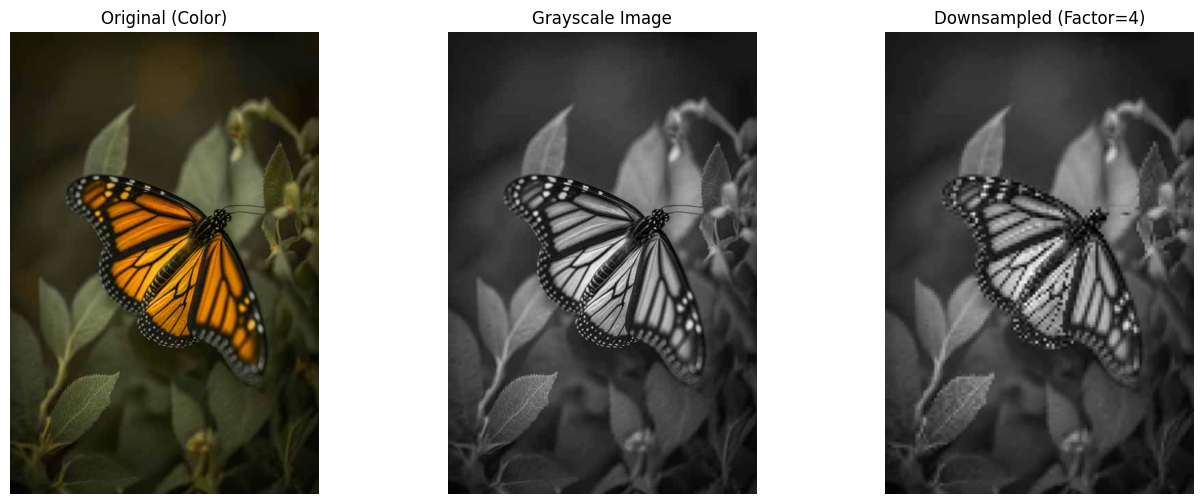

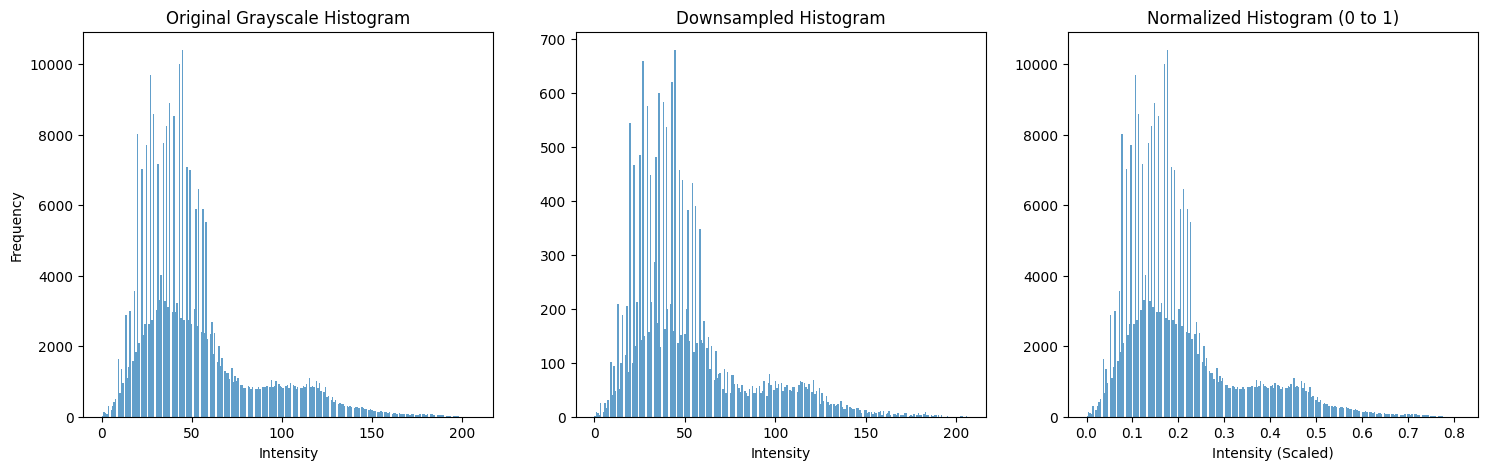

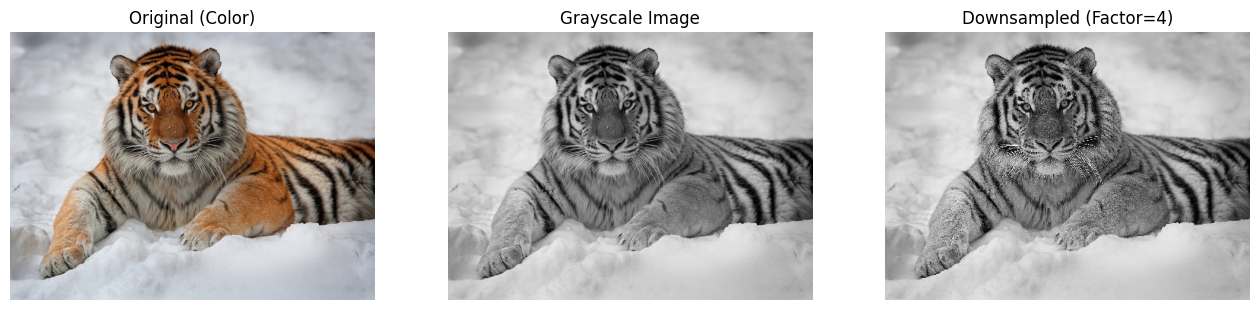

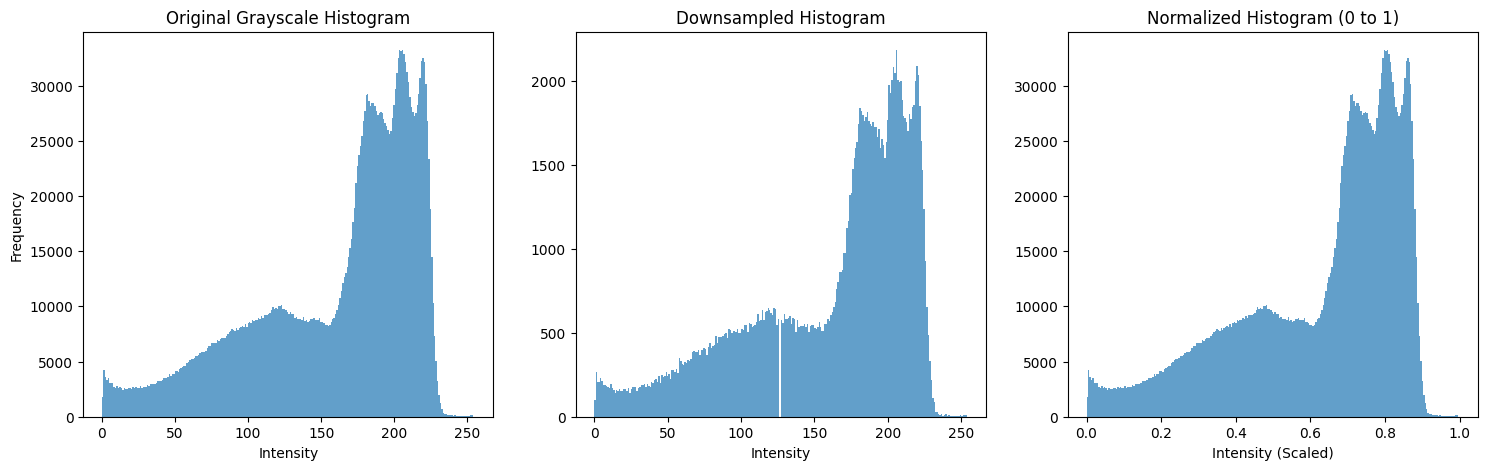

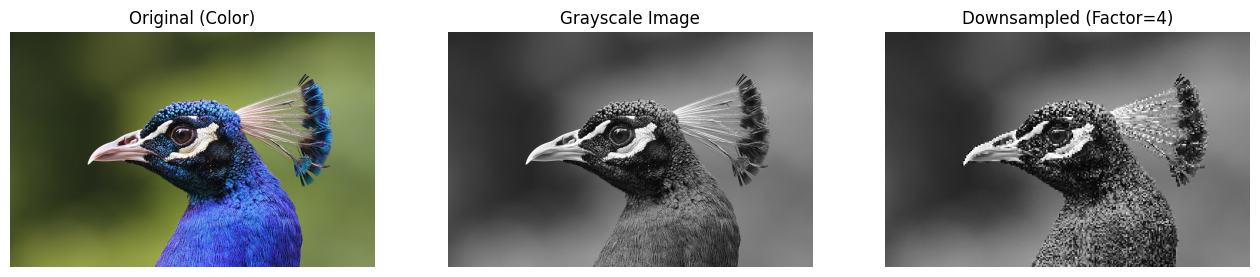

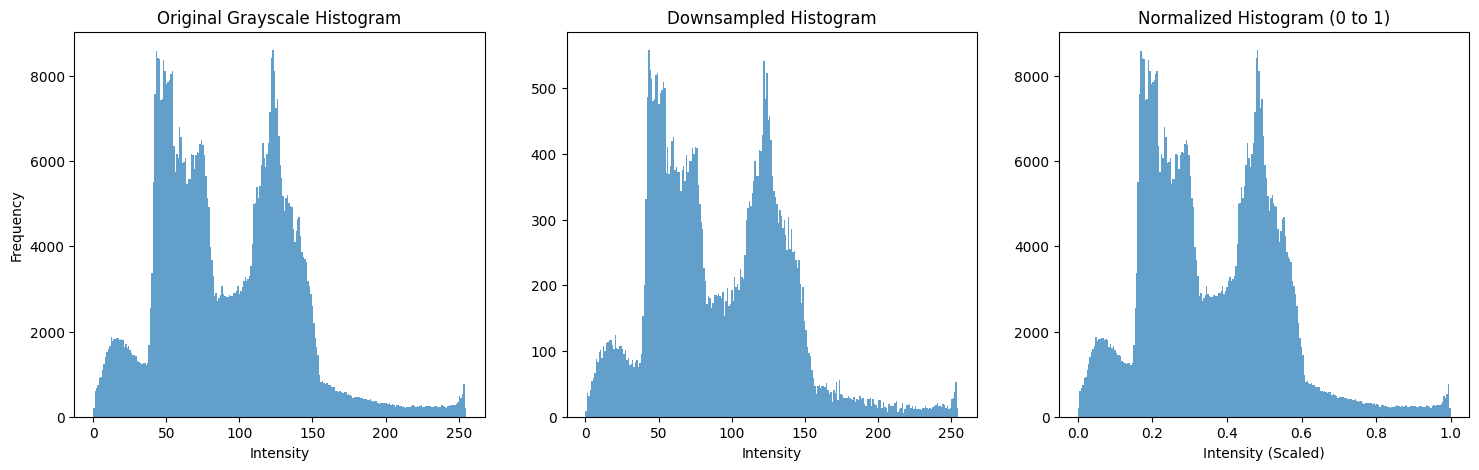

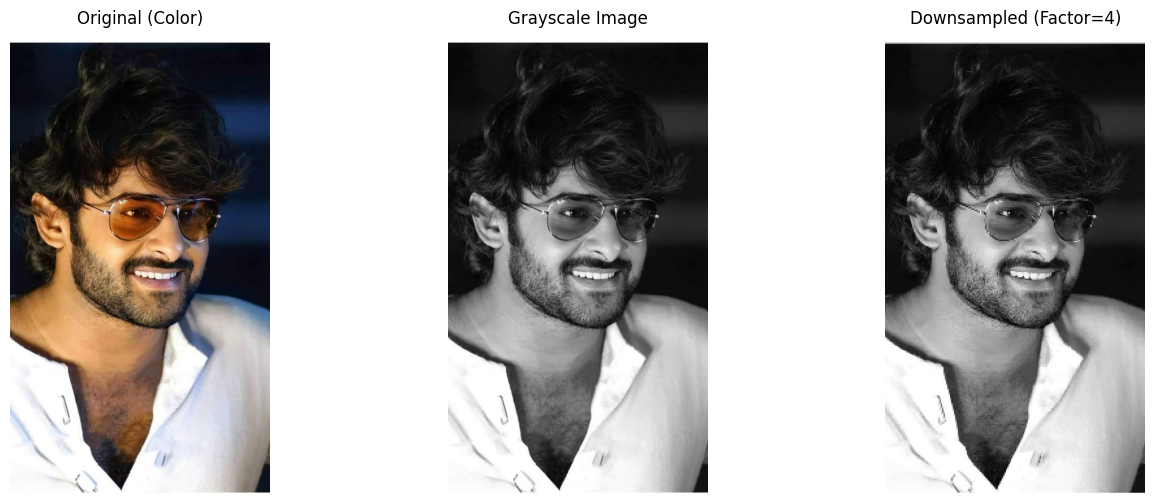

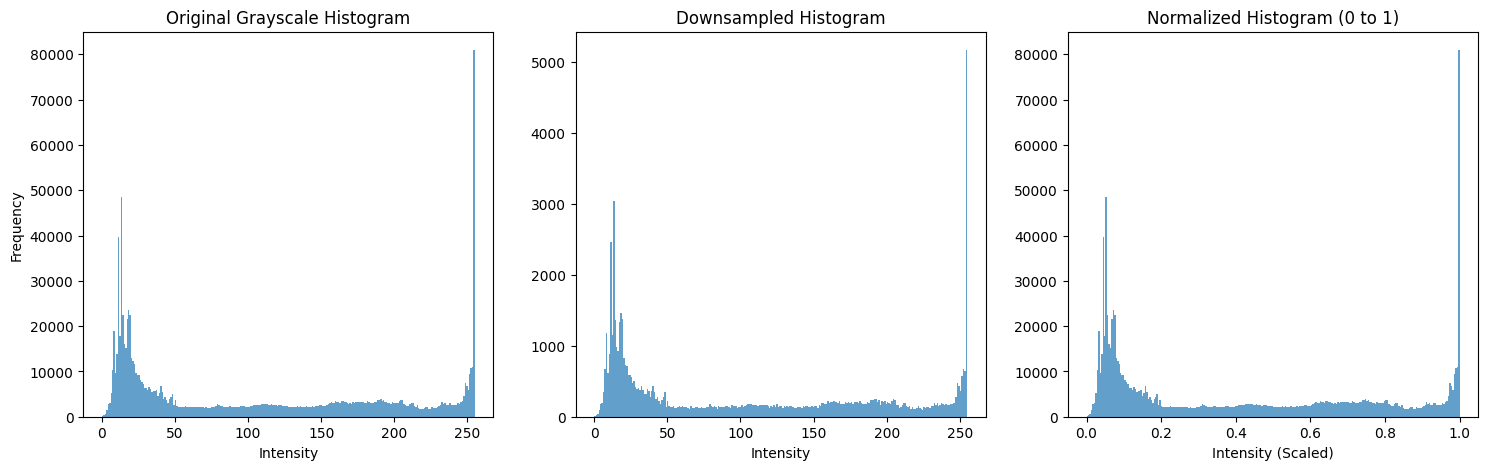

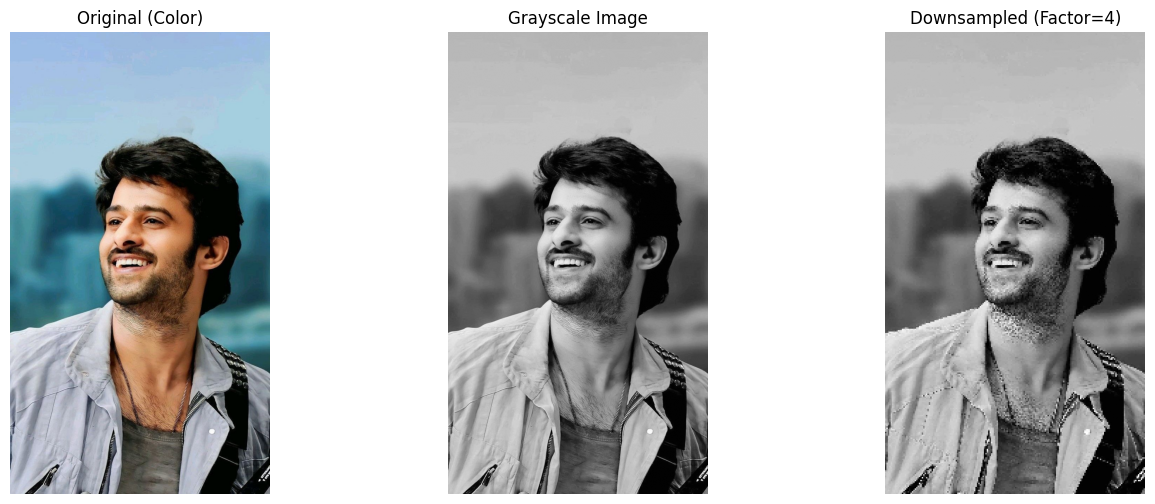

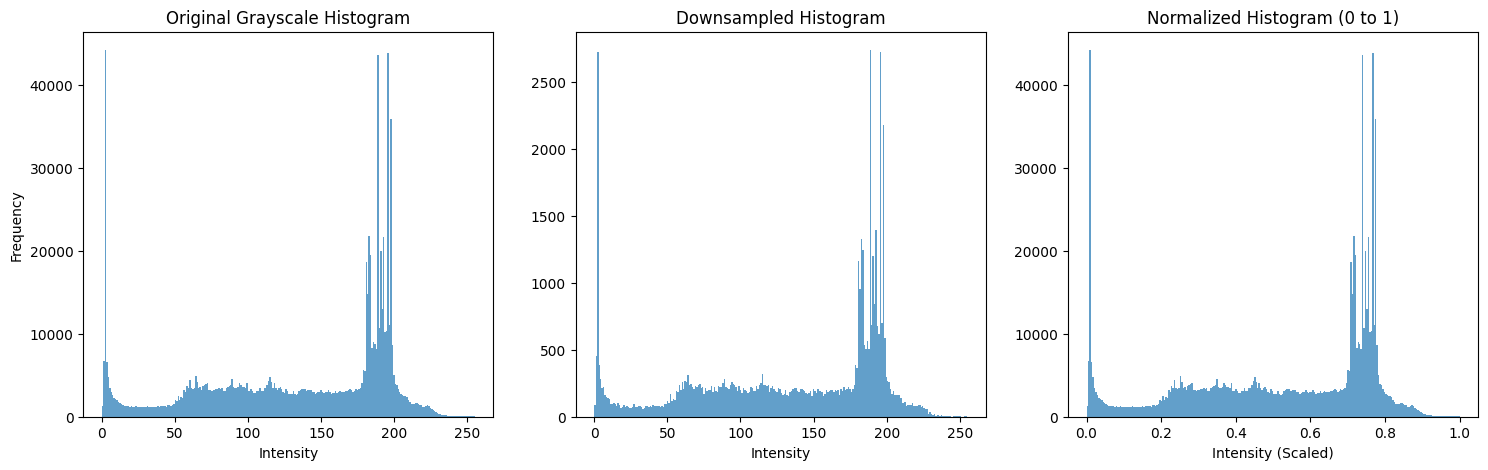

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
for i in range(1,6):
    img = Image.open(f"C:/Users/arvap/Umesh-Projects/CSIWEB/CSGLOB/{i}.jpg")

    img_color = np.array(img)

    img_gray = img.convert("L")
    img_arr = np.array(img_gray)

    downscale_factor = 4
    downsampled = img_arr[::downscale_factor, ::downscale_factor]
    normalized = img_arr / 255.0
    fig, ax = plt.subplots(1, 3, figsize=(16, 6))

    ax[0].imshow(img_color)
    ax[0].set_title("Original (Color)")
    ax[0].axis("off")

    ax[1].imshow(img_arr, cmap="gray")
    ax[1].set_title("Grayscale Image")
    ax[1].axis("off")

    ax[2].imshow(downsampled, cmap="gray")
    ax[2].set_title(f"Downsampled (Factor={downscale_factor})")
    ax[2].axis("off")

    plt.show()

    fig2, ax2 = plt.subplots(1, 3, figsize=(18, 5))

    ax2[0].hist(img_arr.flatten(), bins=256, alpha=0.7)
    ax2[0].set_title("Original Grayscale Histogram")
    ax2[0].set_xlabel("Intensity")
    ax2[0].set_ylabel("Frequency")

    ax2[1].hist(downsampled.flatten(), bins=256, alpha=0.7)
    ax2[1].set_title("Downsampled Histogram")
    ax2[1].set_xlabel("Intensity")
    
    ax2[2].hist(normalized.flatten(), bins=256, alpha=0.7)
    ax2[2].set_title("Normalized Histogram (0 to 1)")
    ax2[2].set_xlabel("Intensity (Scaled)")

    plt.show()


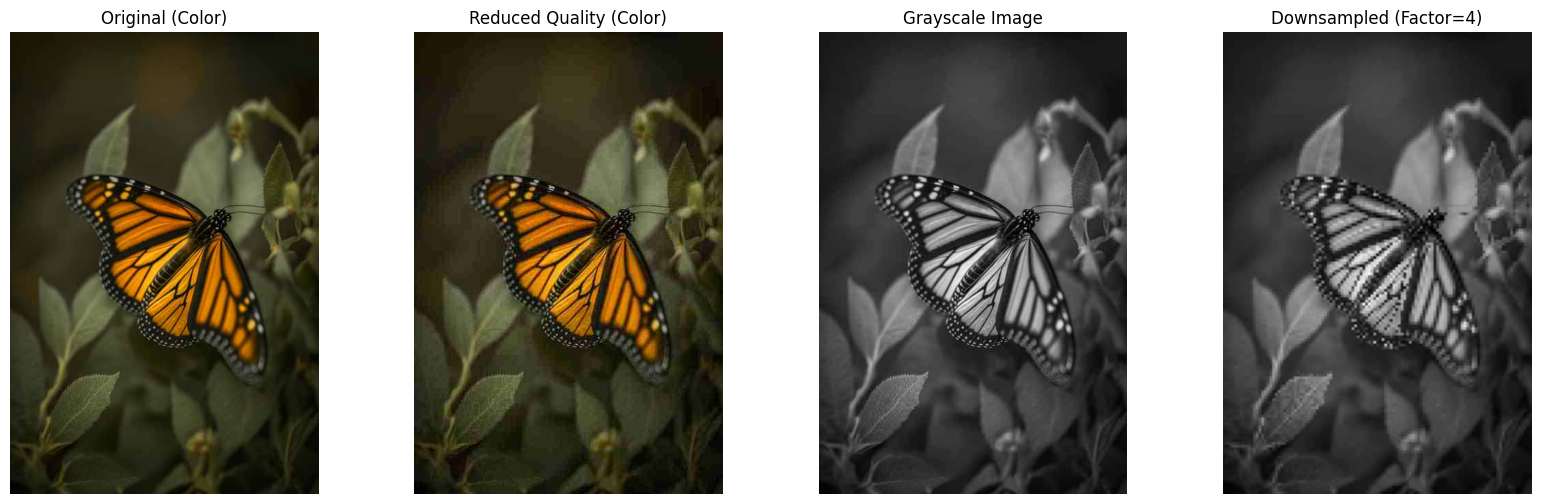

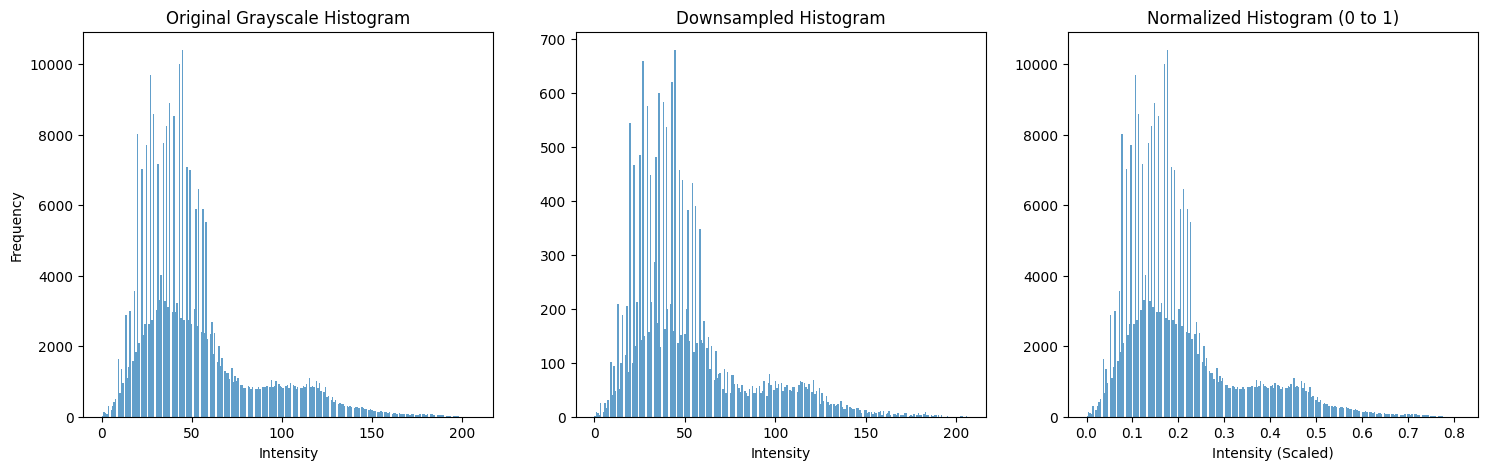

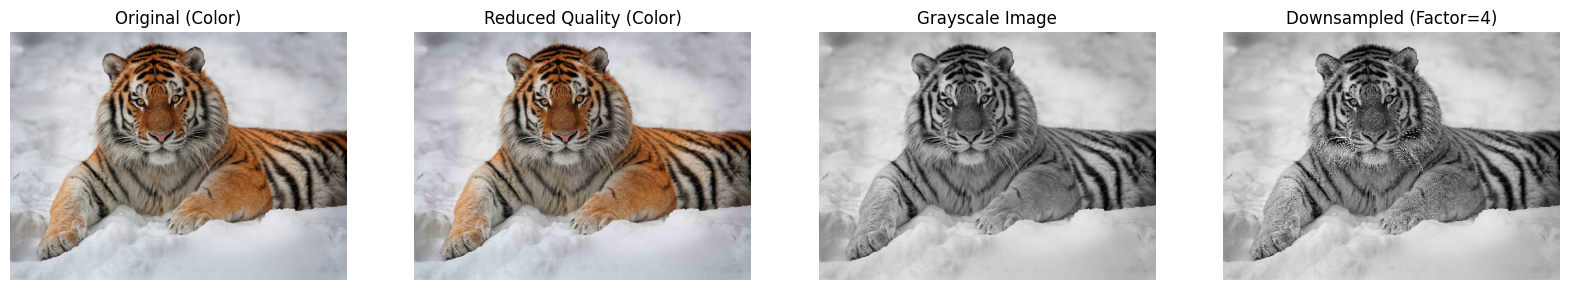

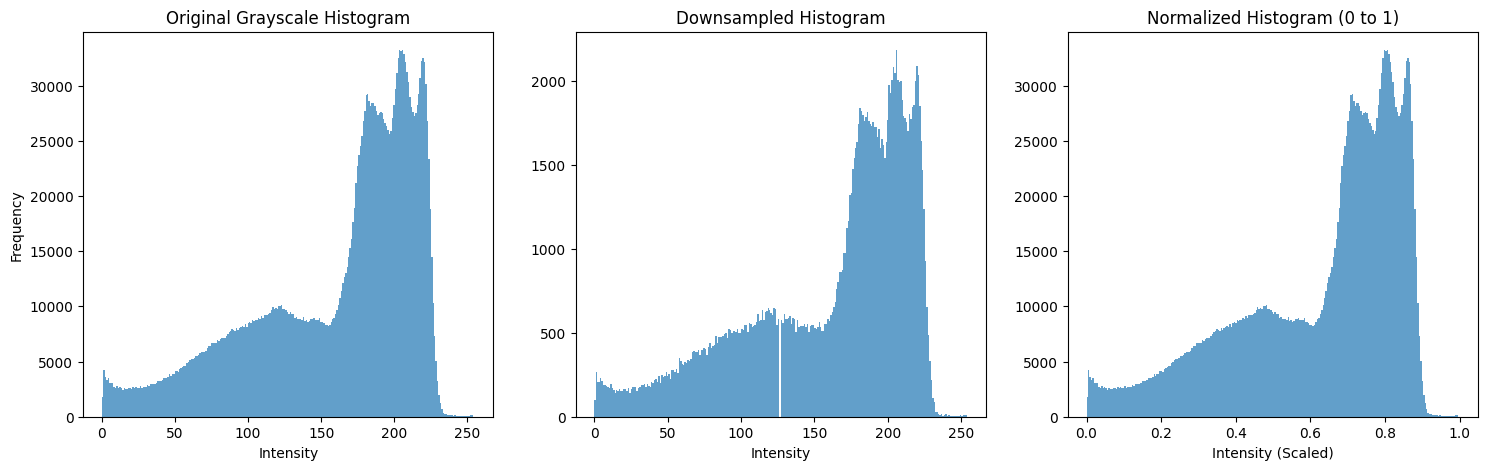

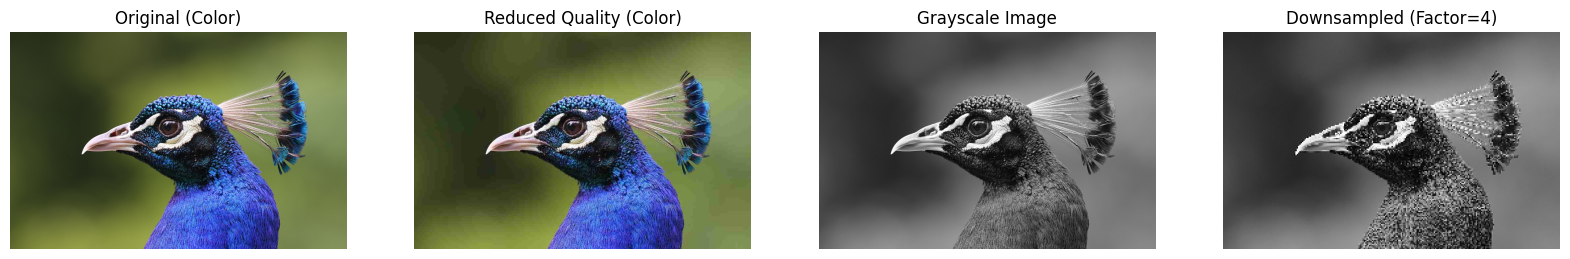

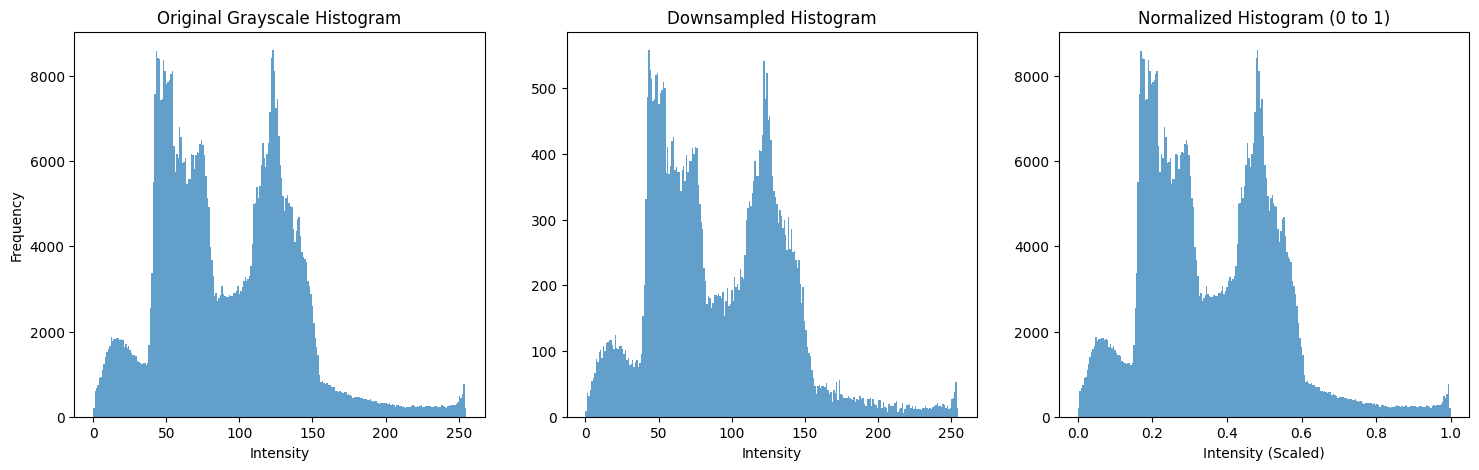

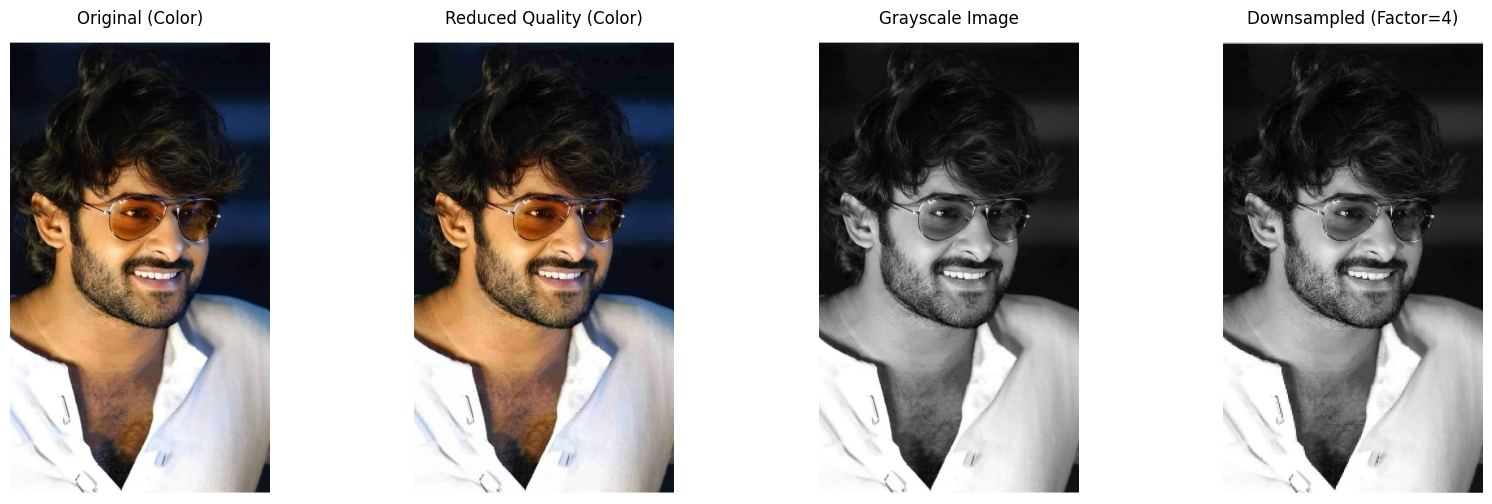

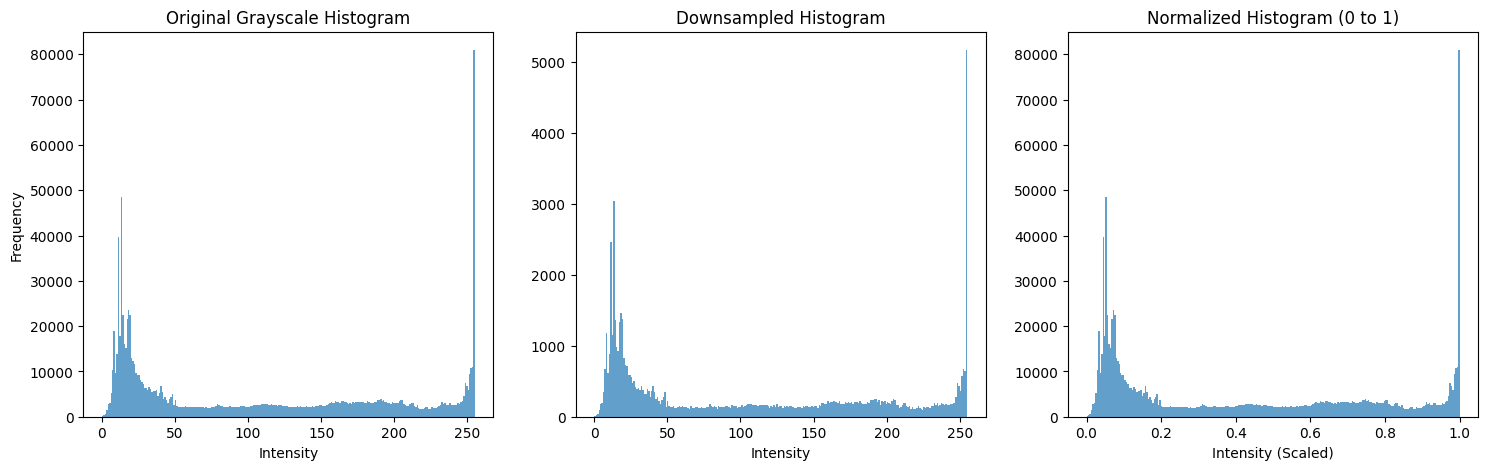

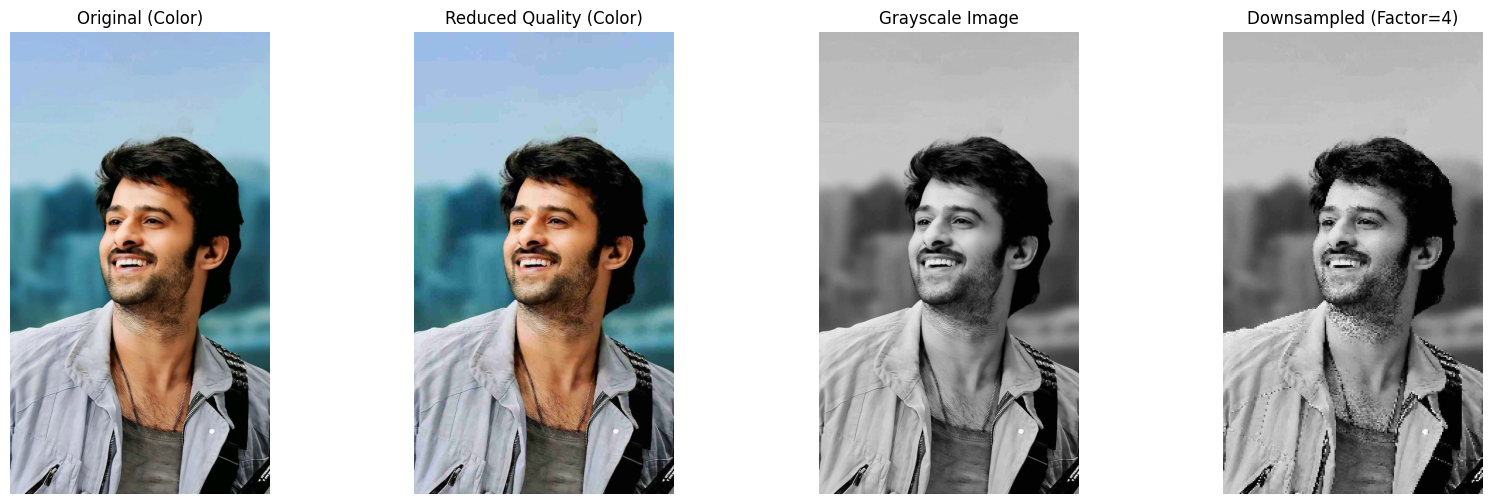

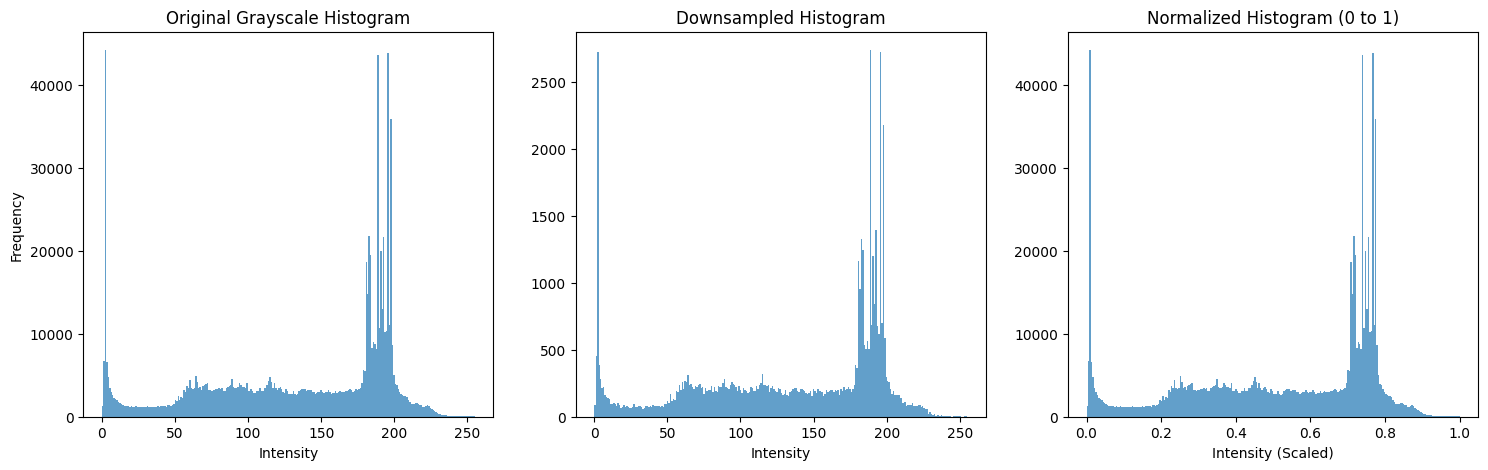

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import io

for i in range(1, 6):
    img = Image.open(f"C:/Users/arvap/Umesh-Projects/CSIWEB/CSGLOB/{i}.jpg")

    img_color = np.array(img)

    img_gray = img.convert("L")
    img_arr = np.array(img_gray)

    downscale_factor = 4
    downsampled = img_arr[::downscale_factor, ::downscale_factor]
    normalized = img_arr / 255.0

    # ---- Reduced Quality Color Image (JPEG Compression) ----
    buffer = io.BytesIO()
    img.save(buffer, format="JPEG", quality=20)  # Lower quality = more compression
    buffer.seek(0)
    low_quality_img = Image.open(buffer)
    low_quality_arr = np.array(low_quality_img)

    fig, ax = plt.subplots(1, 4, figsize=(20, 6))

    ax[0].imshow(img_color)
    ax[0].set_title("Original (Color)")
    ax[0].axis("off")

    ax[1].imshow(low_quality_arr)
    ax[1].set_title("Reduced Quality (Color)")
    ax[1].axis("off")

    ax[2].imshow(img_arr, cmap="gray")
    ax[2].set_title("Grayscale Image")
    ax[2].axis("off")

    ax[3].imshow(downsampled, cmap="gray")
    ax[3].set_title(f"Downsampled (Factor={downscale_factor})")
    ax[3].axis("off")

    plt.show()

    fig2, ax2 = plt.subplots(1, 3, figsize=(18, 5))

    ax2[0].hist(img_arr.flatten(), bins=256, alpha=0.7)
    ax2[0].set_title("Original Grayscale Histogram")
    ax2[0].set_xlabel("Intensity")
    ax2[0].set_ylabel("Frequency")

    ax2[1].hist(downsampled.flatten(), bins=256, alpha=0.7)
    ax2[1].set_title("Downsampled Histogram")
    ax2[1].set_xlabel("Intensity")

    ax2[2].hist(normalized.flatten(), bins=256, alpha=0.7)
    ax2[2].set_title("Normalized Histogram (0 to 1)")
    ax2[2].set_xlabel("Intensity (Scaled)")

    plt.show()


C:\Users\arvap\AppData\Local\Temp\ipykernel_27300\3407354792.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['appointment_time']).dt.hour
c:\Users\arvap\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


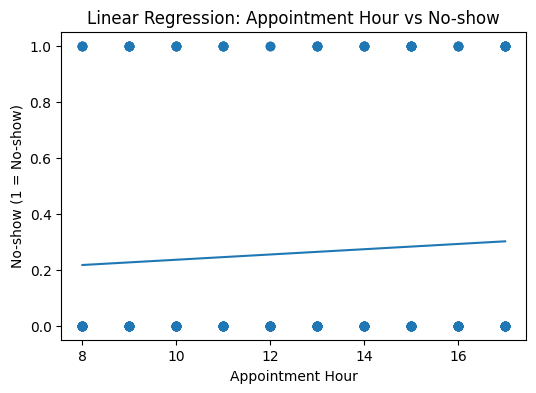

(array([0.00939658]), np.float64(0.14169702768679704))

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv("C:\\Users\\arvap\\Downloads\\appointments (1).csv")

# Extract hour from appointment_time
df['hour'] = pd.to_datetime(df['appointment_time']).dt.hour

# Encode status: No-show = 1, others = 0
df['no_show'] = df['status'].apply(lambda x: 1 if x.lower()=="no-show" else 0)

X = df[['hour']]
y = df['no_show']

model = LinearRegression()
model.fit(X, y)

# Predictions for plotting
hours_plot = np.arange(df['hour'].min(), df['hour'].max()+1).reshape(-1,1)
preds = model.predict(hours_plot)

# Plot
plt.figure(figsize=(6,4))
plt.scatter(df['hour'], df['no_show'])
plt.plot(hours_plot, preds)
plt.xlabel("Appointment Hour")
plt.ylabel("No-show (1 = No-show)")
plt.title("Linear Regression: Appointment Hour vs No-show")
plt.show()

model.coef_, model.intercept_

In [7]:
# Step 1: Importing and Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv("cars.csv")   # FIXED: You must use pd.read_csv()

# Step 2: Preprocessing
# Convert categorical text to numbers
df.replace({'Fuel_Type': {'Petrol': 0, 'Diesel': 1, 'CNG': 2}}, inplace=True)
df.replace({'Transmission': {'Manual': 0, 'Automatic': 1}}, inplace=True)

# Separate Features (X) and Target (Y)
X = df.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = df['Selling_Price']

# Step 3: Training
# Split data: 80% Training, 20% Testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

# Initialize and Train
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)
print("Model Trained Successfully!")

# Step 4: Prediction
# Predict on Test Data
test_pred = lin_reg_model.predict(X_test)

# Evaluate the model
score = r2_score(Y_test, test_pred)
print("R2 Score:", score)


KeyError: "['Car_Name', 'Selling_Price'] not found in axis"